In [630]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file data dari pc
data_path = 'D:\Dokumen\TELKOM UNIVERSITY\TF-43-03\Semester 8\Tugas Akhir\Data Alat Ukur\Data Komparasi'
filename = '/Data_DL_TurunHujan_TULT.xlsx'
sheet_name = 'Data Hujan 6'

# Membaca file Excel dan membuat objek
xls = pd.ExcelFile(data_path + filename)

# Konfigurasi penyimpanan file hasil validasi dan rata-rata 
namasheet ='DH6'
savedfile = "\TULT_DL_" + namasheet + ".xlsx"

# Membaca sheet file excel yang telah dibuat
df1 = pd.read_excel(xls, sheet_name=sheet_name)

# Memanggil dataframe
df1

,Tanggal,Waktu,pH,Konduktivitas,TDS,Curah Hujan,Temperatur Air
0,2023-06-06,00:00:07,7.0,1.640,92.69,0.568001,25.87
1,2023-06-06,00:00:27,6.6,1.625,93.23,0.568001,25.87
2,2023-06-06,00:00:47,6.9,1.609,91.25,0.568001,25.63
3,2023-06-06,00:01:07,7.1,1.622,88.69,0.568001,24.35
4,2023-06-06,00:01:28,7.1,1.623,88.31,0.568001,24.97
...,...,...,...,...,...,...,...
8505,2023-06-07,23:58:36,9.5,1.600,0.22,0.000000,25.85
8506,2023-06-07,23:58:56,9.9,1.400,0.89,0.000000,24.18
8507,2023-06-07,23:59:16,6.4,1.000,0.69,0.000000,24.62
8508,2023-06-07,23:59:36,9.0,1.800,0.39,0.000000,24.93


In [631]:
## Penanganan kolom pada dataframe untuk validasi

In [632]:
# Menggabungkan kolom Tanggal dan Waktu menjadi satu kolom Timestamp
df1['Waktu'] = pd.to_datetime(df1['Waktu'], format='%H:%M:%S').dt.time
df1['Timestamp'] = pd.to_datetime(df1['Tanggal'].astype(str) + ' ' + df1['Waktu'].astype(str))

# Memindahkan kolom Timestamp ke depan
timestamp_col = df1.pop('Timestamp')
df1.insert(0, 'Timestamp', timestamp_col)

# Menghapus kolom 'Tanggal' dan 'Waktu' dari DataFrame
df1 = df1.drop(['Tanggal', 'Waktu'], axis=1)

# Menampilkan DataFrame
df1

,Timestamp,pH,Konduktivitas,TDS,Curah Hujan,Temperatur Air
0,2023-06-06 00:00:07,7.0,1.640,92.69,0.568001,25.87
1,2023-06-06 00:00:27,6.6,1.625,93.23,0.568001,25.87
2,2023-06-06 00:00:47,6.9,1.609,91.25,0.568001,25.63
3,2023-06-06 00:01:07,7.1,1.622,88.69,0.568001,24.35
4,2023-06-06 00:01:28,7.1,1.623,88.31,0.568001,24.97
...,...,...,...,...,...,...
8505,2023-06-07 23:58:36,9.5,1.600,0.22,0.000000,25.85
8506,2023-06-07 23:58:56,9.9,1.400,0.89,0.000000,24.18
8507,2023-06-07 23:59:16,6.4,1.000,0.69,0.000000,24.62
8508,2023-06-07 23:59:36,9.0,1.800,0.39,0.000000,24.93


In [633]:
## Duplikat data mentah untuk dataframe perbandingan
dfx=df1

In [634]:
## Melihat karakteristik dari data
df1.describe()

,pH,Konduktivitas,TDS,Curah Hujan,Temperatur Air
count,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000
mean,7.256569,1.397219,43.631005,0.253921,25.008190
std,0.909922,0.252126,34.973481,0.238478,0.576851
min,6.000000,1.000000,0.100000,0.000000,24.000000
25%,6.700000,1.203000,0.750000,0.000000,24.510000
50%,7.000000,1.245000,53.300000,0.298200,25.000000
75%,7.200000,1.601000,59.100000,0.298200,25.510000
max,10.000000,2.000000,97.000000,0.667401,26.000000


In [635]:
## Menampilkan sebaran data dari raw data dengan boxplot

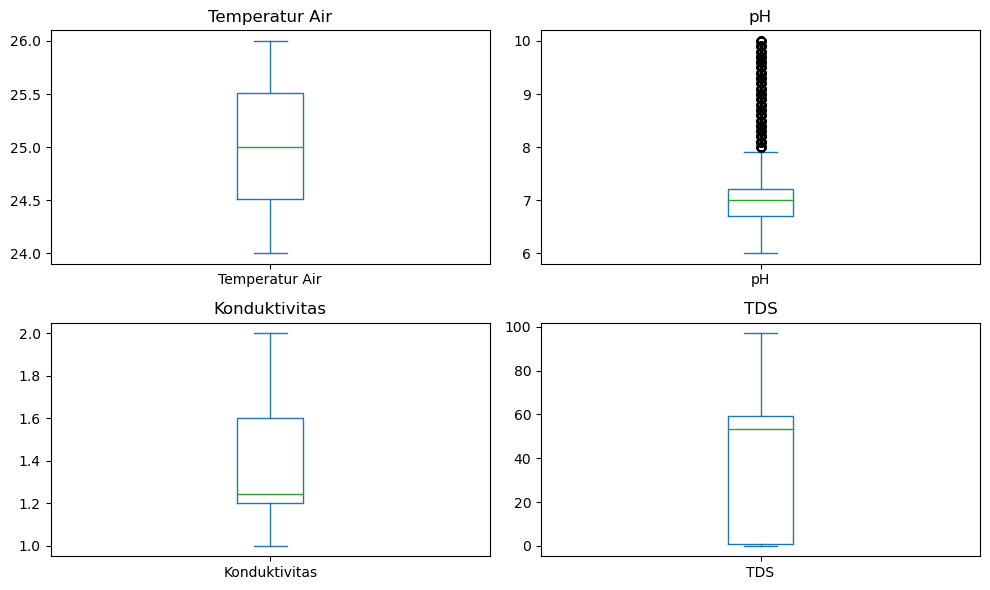

In [636]:
# Membuat subplots dengan 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Menampilkan boxplot untuk kolom "Temperatur Air" pada subplot pertama
df1['Temperatur Air'].plot(kind='box', ax=axes[0, 0])
axes[0, 0].set_title('Temperatur Air')

# Menampilkan boxplot untuk kolom "pH" pada subplot kedua
df1['pH'].plot(kind='box', ax=axes[0, 1])
axes[0, 1].set_title('pH')

# Menampilkan boxplot untuk kolom "Konduktivitas" pada subplot ketiga
df1['Konduktivitas'].plot(kind='box', ax=axes[1, 0])
axes[1, 0].set_title('Konduktivitas')

# Menampilkan boxplot untuk kolom "TDS" pada subplot keempat
df1['TDS'].plot(kind='box', ax=axes[1, 1])
axes[1, 1].set_title('TDS')

# Menyesuaikan jarak vertikal antara subplot
plt.subplots_adjust(hspace=0.5)

# Menampilkan layout subplot
plt.tight_layout()

# Menampilkan boxplot secara terpisah
plt.show()

In [637]:
## Mengganti nilai-nilai NaN pada dataframe dengan 0
df1.fillna(0, inplace=True)

In [638]:
## Validasi Kontrol Kualitas & Boxplot

In [639]:
# Temperatur Air

In [640]:
# Outrange detection
df1['Temperatur Air'] = df1['Temperatur Air'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df6 = df1[(df1['Temperatur Air']>= 24) &  (df1['Temperatur Air'] <= 26)]
df6 = df6[['Timestamp','Temperatur Air']]

# Outlier detection
df6['Temperatur Air'].describe()
Q3 = df6['Temperatur Air'].describe()['75%']
Q1 = df6['Temperatur Air'].describe()['25%']
IQR = Q3 - Q1
UF = Q3 + (1.5*IQR)
LF = Q1 - (1.5*IQR)
df6= df6[(df6['Temperatur Air'] < UF) & (df6['Temperatur Air'] > LF)]

# Rata-rata data
df_6 = df6.groupby(pd.Grouper(key='Timestamp',freq ='1Min')).mean()

In [641]:
## pH

In [642]:
# Outrange detection
df1['pH'] = df1['pH'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df7 = df1[(df1['pH']> 0) &  (df1['pH'] <= 14)]
df7 = df7[['Timestamp','pH']]

# Outlier detection
df7['pH'].describe()
Q3 = df7['pH'].describe()['75%']
Q1 = df7['pH'].describe()['25%']
IQR = Q3 - Q1
UF = Q3 + (1.5*IQR)
LF = Q1 - (1.5*IQR)
df7= df7[(df7.pH < UF) & (df7.pH > LF)]

# Rata-rata data
df_7 = df7.groupby(pd.Grouper(key='Timestamp',freq ='1Min')).mean()

In [643]:
## Konduktivitas

In [644]:
# Outrange detection
df1['Konduktivitas'] = df1['Konduktivitas'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df8 = df1[(df1['Konduktivitas']>= 0) &  (df1['Konduktivitas'] <= 1000)]
df8 = df8[['Timestamp','Konduktivitas']]

# Outlier detection
df8['Konduktivitas'].describe()
Q3 = df8['Konduktivitas'].describe()['75%']
Q1 = df8['Konduktivitas'].describe()['25%']
IQR = Q3 - Q1
UF = Q3 + (1.5*IQR)
LF = Q1 - (1.5*IQR)
df8= df8[(df8.Konduktivitas < UF) & (df8.Konduktivitas > LF)]

# Rata-rata data
df_8 = df8.groupby(pd.Grouper(key='Timestamp',freq ='1Min')).mean()

In [645]:
## TDS

In [646]:
# Outrange detection
df1['TDS'] = df1['TDS'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df9 = df1[(df1['TDS']>= 0) &  (df1['TDS'] <= 1000)]
df9 = df9[['Timestamp','TDS']]

# Outlier detection
df9['TDS'].describe()
Q3 = df9['TDS'].describe()['75%']
Q1 = df9['TDS'].describe()['25%']
IQR = Q3 - Q1
UF = Q3 + (1.5*IQR)
LF = Q1 - (1.5*IQR)
df9= df9[(df9.TDS < UF) & (df9.TDS > LF)]

#Rata-rata data
df_9 = df9.groupby(pd.Grouper(key='Timestamp',freq ='1Min')).mean()

In [647]:
## Curah hujan

In [648]:
# Outrange detection
df1['Curah Hujan'] = df1['Curah Hujan'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df10 = df1[(df1['Curah Hujan'] >= 0)]
df10 = df10[['Timestamp','Curah Hujan']]

# Rata-rata data
df_10 = df10.groupby(pd.Grouper(key='Timestamp',freq ='1Min')).mean()

In [649]:
## Menampilkan sebaran data dari data validasi dengan boxplot

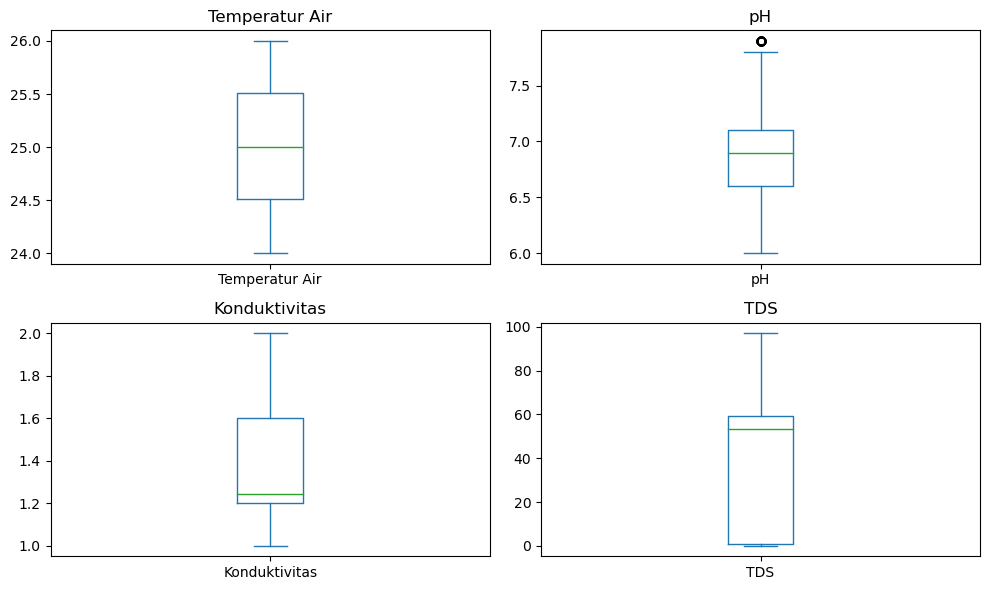

In [650]:
# Membuat subplots dengan 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Menampilkan boxplot untuk kolom "Temperatur Air" pada subplot pertama
df6['Temperatur Air'].plot(kind='box', ax=axes[0, 0])
axes[0, 0].set_title('Temperatur Air')

# Menampilkan boxplot untuk kolom "pH" pada subplot kedua
df7['pH'].plot(kind='box', ax=axes[0, 1])
axes[0, 1].set_title('pH')

# Menampilkan boxplot untuk kolom "Konduktivitas" pada subplot ketiga
df8['Konduktivitas'].plot(kind='box', ax=axes[1, 0])
axes[1, 0].set_title('Konduktivitas')

# Menampilkan boxplot untuk kolom "TDS" pada subplot keempat
df9['TDS'].plot(kind='box', ax=axes[1, 1])
axes[1, 1].set_title('TDS')

# Menyesuaikan jarak vertikal antara subplot
plt.subplots_adjust(hspace=0.5)

# Menampilkan layout subplot
plt.tight_layout()

# Menampilkan boxplot secara terpisah
plt.show()

In [651]:
## Mengolah data hasil validasi

In [652]:
# Merge dengan menyamakan 'Timestamp' masing-masing parameter tanpa rata-rata permenit
df_validasi = pd.merge(dfx['Timestamp'], df6, on='Timestamp', how='outer')
df_validasi = pd.merge(df_validasi, df7, on='Timestamp', how='outer')
df_validasi = pd.merge(df_validasi, df8, on='Timestamp', how='outer')
df_validasi = pd.merge(df_validasi, df9, on='Timestamp', how='outer')
df_validasi = pd.merge(df_validasi, df10, on='Timestamp', how='outer')
df_validasi

,Timestamp,Temperatur Air,pH,Konduktivitas,TDS,Curah Hujan
0,2023-06-06 00:00:07,25.87,7.0,1.640,92.69,0.568001
1,2023-06-06 00:00:27,25.87,6.6,1.625,93.23,0.568001
2,2023-06-06 00:00:47,25.63,6.9,1.609,91.25,0.568001
3,2023-06-06 00:01:07,24.35,7.1,1.622,88.69,0.568001
4,2023-06-06 00:01:28,24.97,7.1,1.623,88.31,0.568001
...,...,...,...,...,...,...
8567,2023-06-07 23:58:36,25.85,NaN,1.600,0.22,0.000000
8568,2023-06-07 23:58:56,24.18,NaN,1.400,0.89,0.000000
8569,2023-06-07 23:59:16,24.62,6.4,1.000,0.69,0.000000
8570,2023-06-07 23:59:36,24.93,NaN,1.800,0.39,0.000000


In [653]:
# Merge dengan menyamakan 'Timestamp' masing-masing parameter dengan rata-rata permenit
df_validasi_rata = pd.merge(df_6, df_7, on='Timestamp', how='outer')
df_validasi_rata = pd.merge(df_validasi_rata, df_8, on='Timestamp', how='outer')
df_validasi_rata = pd.merge(df_validasi_rata, df_9, on='Timestamp', how='outer')
df_validasi_rata = pd.merge(df_validasi_rata, df_10, on='Timestamp', how='outer')
df_validasi_rata

,Temperatur Air,pH,Konduktivitas,TDS,Curah Hujan
Timestamp,,,,,
2023-06-06 00:00:00,25.790000,6.833333,1.624667,92.390000,0.568001
2023-06-06 00:01:00,24.670000,6.933333,1.615333,90.860000,0.568001
2023-06-06 00:02:00,24.950000,6.966667,1.614000,93.533333,0.568001
2023-06-06 00:03:00,25.590000,6.933333,1.616667,94.056667,0.568001
2023-06-06 00:04:00,24.953333,7.000000,1.597000,91.880000,0.568001
...,...,...,...,...,...
2023-06-07 23:55:00,25.243333,NaN,1.733333,0.413333,0.000000
2023-06-07 23:56:00,24.756667,7.600000,1.566667,0.763333,0.000000
2023-06-07 23:57:00,25.363333,7.050000,1.433333,0.593333,0.000000


In [655]:
# # Menggabungkan dataframe raw data dengan data hasil validasi
# df_perbandingan_TA = pd.merge(dfx[['Timestamp', 'Temperatur Air']], df6, on='Timestamp', how='outer')
# df_perbandingan_pH = pd.merge(dfx[['Timestamp', 'pH']], df7, on='Timestamp', how='outer')
# df_perbandingan_EC = pd.merge(dfx[['Timestamp', 'Konduktivitas']], df8, on='Timestamp', how='outer')
# df_perbandingan_TDS = pd.merge(dfx[['Timestamp', 'TDS']], df9, on='Timestamp', how='outer')
# df_perbandingan_CH = pd.merge(dfx[['Timestamp', 'Curah Hujan']], df10, on='Timestamp', how='outer')

# # Merubah nama kolom pada dataframe masing-masing dataframe perbandingan
# ## Temperatur air
# df_perbandingan_TA .rename(columns={'Temperatur Air_x': 'TA Data Mentah'}, inplace=True)
# df_perbandingan_TA .rename(columns={'Temperatur Air_y': 'TA Data Valid'}, inplace=True)

# ## pH
# df_perbandingan_pH.rename(columns={'pH_x': 'pH Data Mentah'}, inplace=True)
# df_perbandingan_pH.rename(columns={'pH_y': 'pH Data Valid'}, inplace=True)

# ## Konduktivitas
# df_perbandingan_EC.rename(columns={'Konduktivitas_x': 'EC Data Mentah'}, inplace=True)
# df_perbandingan_EC.rename(columns={'Konduktivitas_y': 'EC Data Valid'}, inplace=True)

# ## TDS
# df_perbandingan_TDS.rename(columns={'TDS_x': 'TDS Data Mentah'}, inplace=True)
# df_perbandingan_TDS.rename(columns={'TDS_y': 'TDS Data Valid'}, inplace=True)

# ## Curah hujan
# df_perbandingan_CH.rename(columns={'Curah Hujan_x': 'CH Data Mentah'}, inplace=True)
# df_perbandingan_CH.rename(columns={'Curah Hujan_y': 'CH Data Valid'}, inplace=True)

In [ ]:
## Manajemen penyimpanan file kedalam pc

In [654]:
# Menyimpan data kedalam pc dalam bentuk excel
with pd.ExcelWriter(data_path + savedfile, engine='xlsxwriter') as writer:
    df_validasi.to_excel(writer, sheet_name="Validasi_Raw_" + namasheet)
    df_validasi_rata.to_excel(writer, sheet_name="Validasi_Permenit_" + namasheet)
#     df_perbandingan_TA.to_excel(writer, sheet_name="TA_Perbandingan_" + namasheet)
#     df_perbandingan_pH.to_excel(writer, sheet_name="pH_Perbandingan_" + namasheet)
#     df_perbandingan_EC.to_excel(writer, sheet_name="EC_Perbandingan_" + namasheet)
#     df_perbandingan_TDS.to_excel(writer, sheet_name="TDS_Perbandingan_" + namasheet)
#     df_perbandingan_CH.to_excel(writer, sheet_name="CH_Perbandingan_" + namasheet)